In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the usual packages for data analysis then import the dataframe as scores_df.

In [37]:
scores_df = pd.read_csv('df.csv')

In [38]:
scores_df.head()

,School Year,School Code,Organization,Assessment Name,ContentArea,Grade,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular",...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,69.06,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,59.75,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,80.84,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
3,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,65.12,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
4,2015,616,Nellie Hughes Stokes Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,63.08,NaN,442.0,17.680000,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN


First, we are going to make a histogram of the scalescoreavg column to see what type of distribution it has.

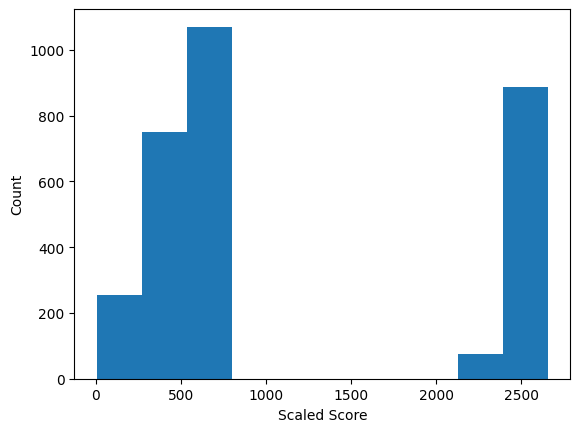

In [39]:
ScaleScoreAvg = scores_df['ScaleScoreAvg']
_ = plt.hist(ScaleScoreAvg)
_ = plt.xlabel('Scaled Score')
_ = plt.ylabel('Count')
plt.show()

Well, this isn't good. The ScaleScoreAvg column is not all scaled so that every test has the same average like I had assumed. It may not be prudent to use it as the target column of a machine learning exercies. Let's try the other score measure, PctProficient.

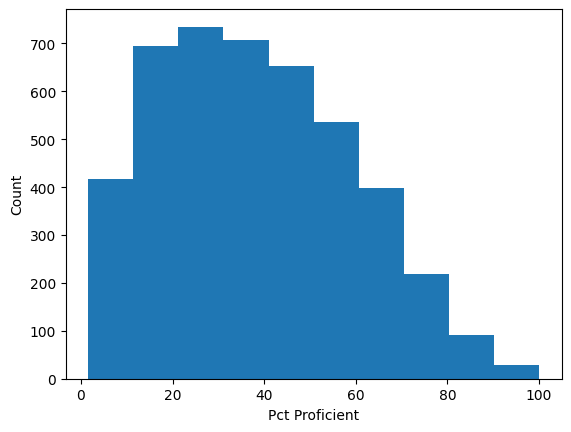

In [40]:
PctProficient = scores_df['PctProficient']
_ = plt.hist(PctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

Better, it appears to be a skewed right distribution. Let's make sure that scores are similar across math and English language arts (ELA).

In [41]:
math_scores_df = scores_df[scores_df['ContentArea'] == 'MATH']
ela_scores_df = scores_df[scores_df['ContentArea'] == 'ELA']

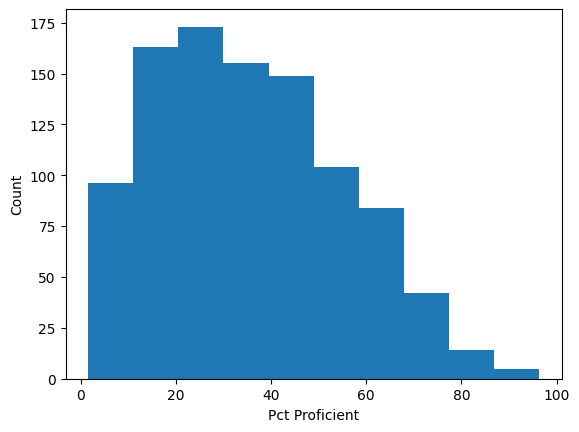

In [42]:
MathPctProficient = math_scores_df['PctProficient']
_ = plt.hist(MathPctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

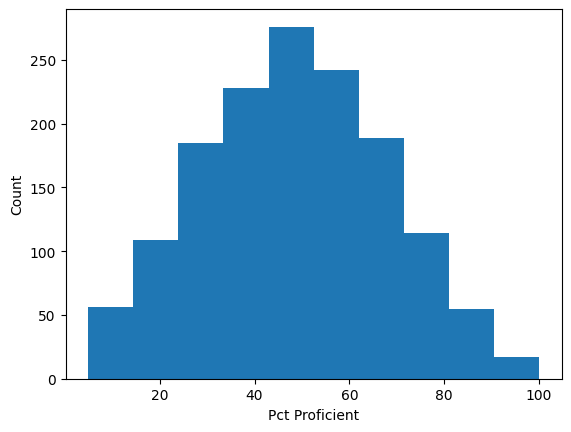

In [43]:
ELAPctProficient = ela_scores_df['PctProficient']
_ = plt.hist(ELAPctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

The PctProficient for math still has that skewed right looked, while for ELA the distribution appears normal with a higher mean. Let's check if these scores come from the same parent function by using a ttest.

In [44]:
from scipy.stats import ttest_ind
ttest_ind(ELAPctProficient, MathPctProficient)

Ttest_indResult(statistic=16.18224541874961, pvalue=4.830226990338291e-56)

With an extremely low t-value we can see that ELA scores are different from math scores. Now let's check across tests to see if the different tests have similar scores.

In [45]:
math_scores_df['Assessment Name'].value_counts()

Smarter Balanced Summative Assessment    806
SAT School-Day (Spring)                  165
DeSSA Alternate Assessment                14
Name: Assessment Name, dtype: int64

The SBSA is by far the most popular assessment, that may come in handy later.

In [46]:
ela_scores_df['Assessment Name'].value_counts()

Smarter Balanced Summative Assessment    1130
SAT School-Day (Spring)                   253
DCAS Alternate Assessment                  53
DeSSA Alternate Assessment                 35
Name: Assessment Name, dtype: int64

In [47]:
SBSA_math = math_scores_df[math_scores_df['Assessment Name'] == 'Smarter Balanced Summative Assessment']
SAT_math = math_scores_df[math_scores_df['Assessment Name'] == 'SAT School-Day (Spring)']
DESSA_math = math_scores_df[math_scores_df['Assessment Name'] == 'DeSSA Alternate Assessment']
SBSAPctProficient = SBSA_math['PctProficient']
SATPctProficient = SAT_math['PctProficient']
DESSAPctProficient = DESSA_math['PctProficient']

In [48]:
ttest_ind(SBSAPctProficient, SATPctProficient)

Ttest_indResult(statistic=4.724190124257282, pvalue=2.6515885505323245e-06)

In [49]:
ttest_ind(SBSAPctProficient, DESSAPctProficient)

Ttest_indResult(statistic=1.7319722085495108, pvalue=0.0836554879427114)

In [50]:
ttest_ind(SATPctProficient, DESSAPctProficient)

Ttest_indResult(statistic=0.2501949420135332, pvalue=0.8027267567249948)

In [51]:
SBSAPctProficient.mean(), SATPctProficient.mean()

(37.0177047146402, 29.204727272727276)

We can see from the p-values of the assessments that they have different means, they are not equally easy. From now on I will use only the test that was by far the most popular the Smarter Balanced Summative Assessment for math.

In [52]:
SAT_math['Organization'].value_counts()

Newark Charter School                                 7
MOT Charter School                                    7
Odyssey Charter School                                7
Sussex Academy                                        6
Caesar Rodney High School                             4
Sussex Central High School                            4
Glasgow High School                                   4
Newark High School                                    4
Penn (William) High School                            4
Woodbridge High School                                4
Indian River High School                              4
Hodgson (Paul M.) Vocational Technical High School    4
Delmar High School                                    4
St. Georges Technical High School                     4
Delaware Military Academy                             4
Delcastle Technical High School                       4
POLYTECH High School                                  4
Sussex Technical High School                    

In [53]:
SBSA_math['Organization'].value_counts()

Campus Community School                               7
East Side Charter School                              7
Kuumba Academy Charter School                         7
Odyssey Charter School                                7
Providence Creek Academy Charter School               7
                                                     ..
Hodgson (Paul M.) Vocational Technical High School    1
Delcastle Technical High School                       1
POLYTECH High School                                  1
Sussex Technical High School                          1
Gateway Charter School                                1
Name: Organization, Length: 205, dtype: int64

We can see that by dropping the other tests we will be losing data mainly from high schools, but there will still be several high schools remaining with just the SBSA

In [54]:
SBSA_ela = ela_scores_df[ela_scores_df['Assessment Name'] == 'Smarter Balanced Summative Assessment']
SAT_ela = ela_scores_df[ela_scores_df['Assessment Name'] == 'SAT School-Day (Spring)']
DESSA_ela = ela_scores_df[ela_scores_df['Assessment Name'] == 'DeSSA Alternate Assessment']
SBSAPctProficientela = SBSA_ela['PctProficient']
SATPctProficient = SAT_ela['PctProficient']
DESSAPctProficient = DESSA_ela['PctProficient']

In [55]:
ttest_ind(SBSAPctProficientela, SATPctProficient)

Ttest_indResult(statistic=-0.440809365799592, pvalue=0.6594200070872691)

In [56]:
ttest_ind(SBSAPctProficientela, DESSAPctProficient)

Ttest_indResult(statistic=4.73232285341107, pvalue=2.492219798483645e-06)

In [57]:
ttest_ind(SATPctProficient, DESSAPctProficient)

Ttest_indResult(statistic=4.314222238335768, pvalue=2.2083534203265074e-05)

In [58]:
ttest_ind(SBSAPctProficientela, SBSAPctProficient)

Ttest_indResult(statistic=12.955206338548972, pvalue=7.161937688992291e-37)

The t-tests for the elsa proportion show that these tests are also not equally difficult. Once again I will keep SBSA while dropping the other tests. Also I decided to check to see if the SBSA math and ela tests have the same mean, they do not.

In [59]:
SBSA_math.head()

,School Year,School Code,Organization,Assessment Name,ContentArea,Grade,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular",...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
1,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,59.75,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,65.12,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
5,2015,616,Nellie Hughes Stokes Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,57.60,NaN,442.0,17.680000,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
7,2015,618,Star Hill Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,68.15,NaN,495.0,19.800000,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
9,2015,620,W. B. Simpson Elementary School,Smarter Balanced Summative Assessment,MATH,All Students,56.66,NaN,542.0,19.357143,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [60]:
SBSA_ela.head()

,School Year,School Code,Organization,Assessment Name,ContentArea,Grade,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular",...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,2015,610,Allen Frear Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,69.06,NaN,699.0,19.971429,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,612,Major George S. Welch Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,80.84,NaN,436.0,16.769231,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
4,2015,616,Nellie Hughes Stokes Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,63.08,NaN,442.0,17.680000,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
6,2015,618,Star Hill Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,75.00,NaN,495.0,19.800000,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
8,2015,620,W. B. Simpson Elementary School,Smarter Balanced Summative Assessment,ELA,All Students,73.04,NaN,542.0,19.357143,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [61]:
import seaborn as sns

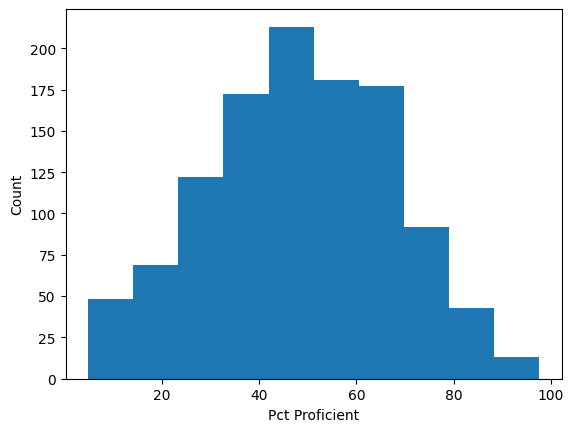

In [62]:
PctProficient = SBSA_ela['PctProficient']
_ = plt.hist(PctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

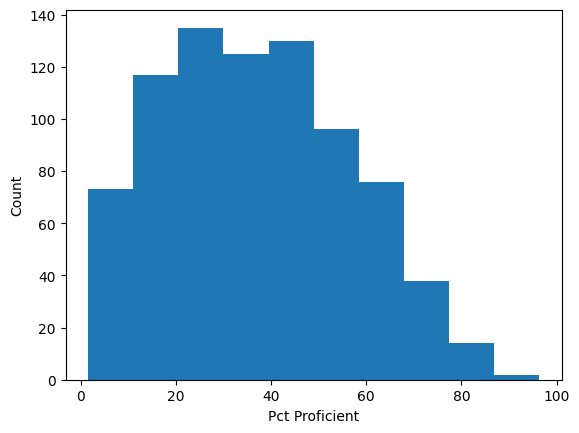

In [63]:
PctProficient = SBSA_math['PctProficient']
_ = plt.hist(PctProficient)
_ = plt.xlabel('Pct Proficient')
_ = plt.ylabel('Count')
plt.show()

The SBSA math test still shows that skewed right character, while the ela test appears normal.

In [64]:
SBSA_ela = SBSA_ela.drop(columns=['School Year', 'School Code', 'Organization', 'Assessment Name', 'ContentArea', 'Grade'])
SBSA_ela.head()

,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Assistant Superintendent,Students Per Administrative Assistant,"Students Per Supervisor, Pupil Support",Students Per Crafts & Trades,...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
0,69.06,NaN,699.0,19.971429,116.500000,699.0,NaN,NaN,NaN,NaN,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
2,80.84,NaN,436.0,16.769231,145.333333,436.0,NaN,NaN,NaN,NaN,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
4,63.08,NaN,442.0,17.680000,55.250000,NaN,NaN,NaN,NaN,NaN,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
6,75.00,NaN,495.0,19.800000,123.750000,495.0,NaN,NaN,NaN,NaN,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
8,73.04,NaN,542.0,19.357143,180.666667,NaN,NaN,NaN,NaN,NaN,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


In [65]:
SBSA_math = SBSA_math.drop(columns=['School Year', 'School Code', 'Organization', 'Assessment Name', 'ContentArea', 'Grade'])
SBSA_math.head()

,PctProficient,ScaleScoreAvg,FallEnrollment,"Students Per Teacher, Regular","Students Per Teacher, Special","Students Per Specialist, Instructional",Students Per Assistant Superintendent,Students Per Administrative Assistant,"Students Per Supervisor, Pupil Support",Students Per Crafts & Trades,...,Students Per Nurse,Students Per Social Worker,Students Per Principal,Students Per Guidance Counselor,Students Per Assistant Principal,Students Per Librarian,Students Per Service Aide,Students Per Bus Driver & Laborer,Students Per Other General Support,Students Per Psychometrist
1,59.75,NaN,699.0,19.971429,116.500000,699.0,NaN,NaN,NaN,NaN,...,699.0,NaN,699.0,699.0,NaN,NaN,NaN,NaN,NaN,NaN
3,65.12,NaN,436.0,16.769231,145.333333,436.0,NaN,NaN,NaN,NaN,...,NaN,NaN,436.0,436.0,436.0,436.0,NaN,NaN,NaN,NaN
5,57.60,NaN,442.0,17.680000,55.250000,NaN,NaN,NaN,NaN,NaN,...,442.0,NaN,442.0,442.0,442.0,442.0,NaN,NaN,NaN,NaN
7,68.15,NaN,495.0,19.800000,123.750000,495.0,NaN,NaN,NaN,NaN,...,495.0,NaN,495.0,495.0,495.0,495.0,495.0,NaN,NaN,NaN
9,56.66,NaN,542.0,19.357143,180.666667,NaN,NaN,NaN,NaN,NaN,...,542.0,NaN,542.0,542.0,NaN,542.0,NaN,NaN,NaN,NaN


Lets check the ScaleScoreAvg again, now that the come from the same test the might have a distribution.

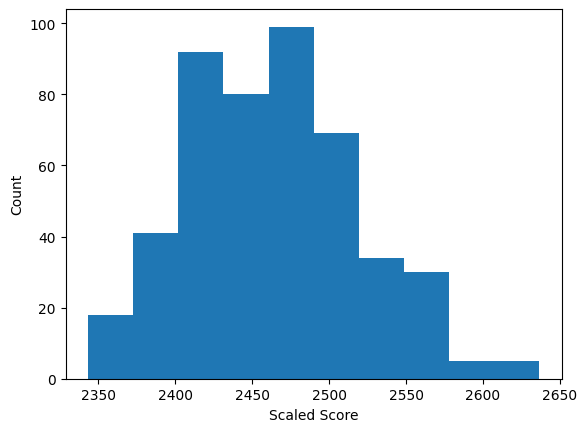

In [66]:
ScaleScoreAvgMath = SBSA_math['ScaleScoreAvg']
_ = plt.hist(ScaleScoreAvgMath)
_ = plt.xlabel('Scaled Score')
_ = plt.ylabel('Count')
plt.show()

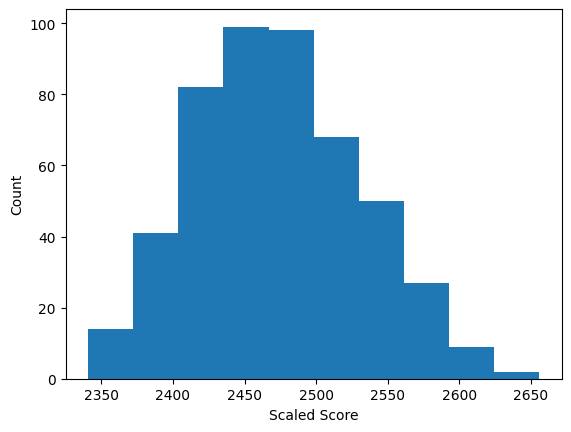

In [67]:
ScaleScoreAvgELA = SBSA_ela['ScaleScoreAvg']
_ = plt.hist(ScaleScoreAvgELA)
_ = plt.xlabel('Scaled Score')
_ = plt.ylabel('Count')
plt.show()

Maybe I can use the ScaleScoreAvg as the target of machine learning, it would probably still be prudent to keep Math and ELA seperate. Lets make heat maps of the correlations between figures.

<AxesSubplot:>

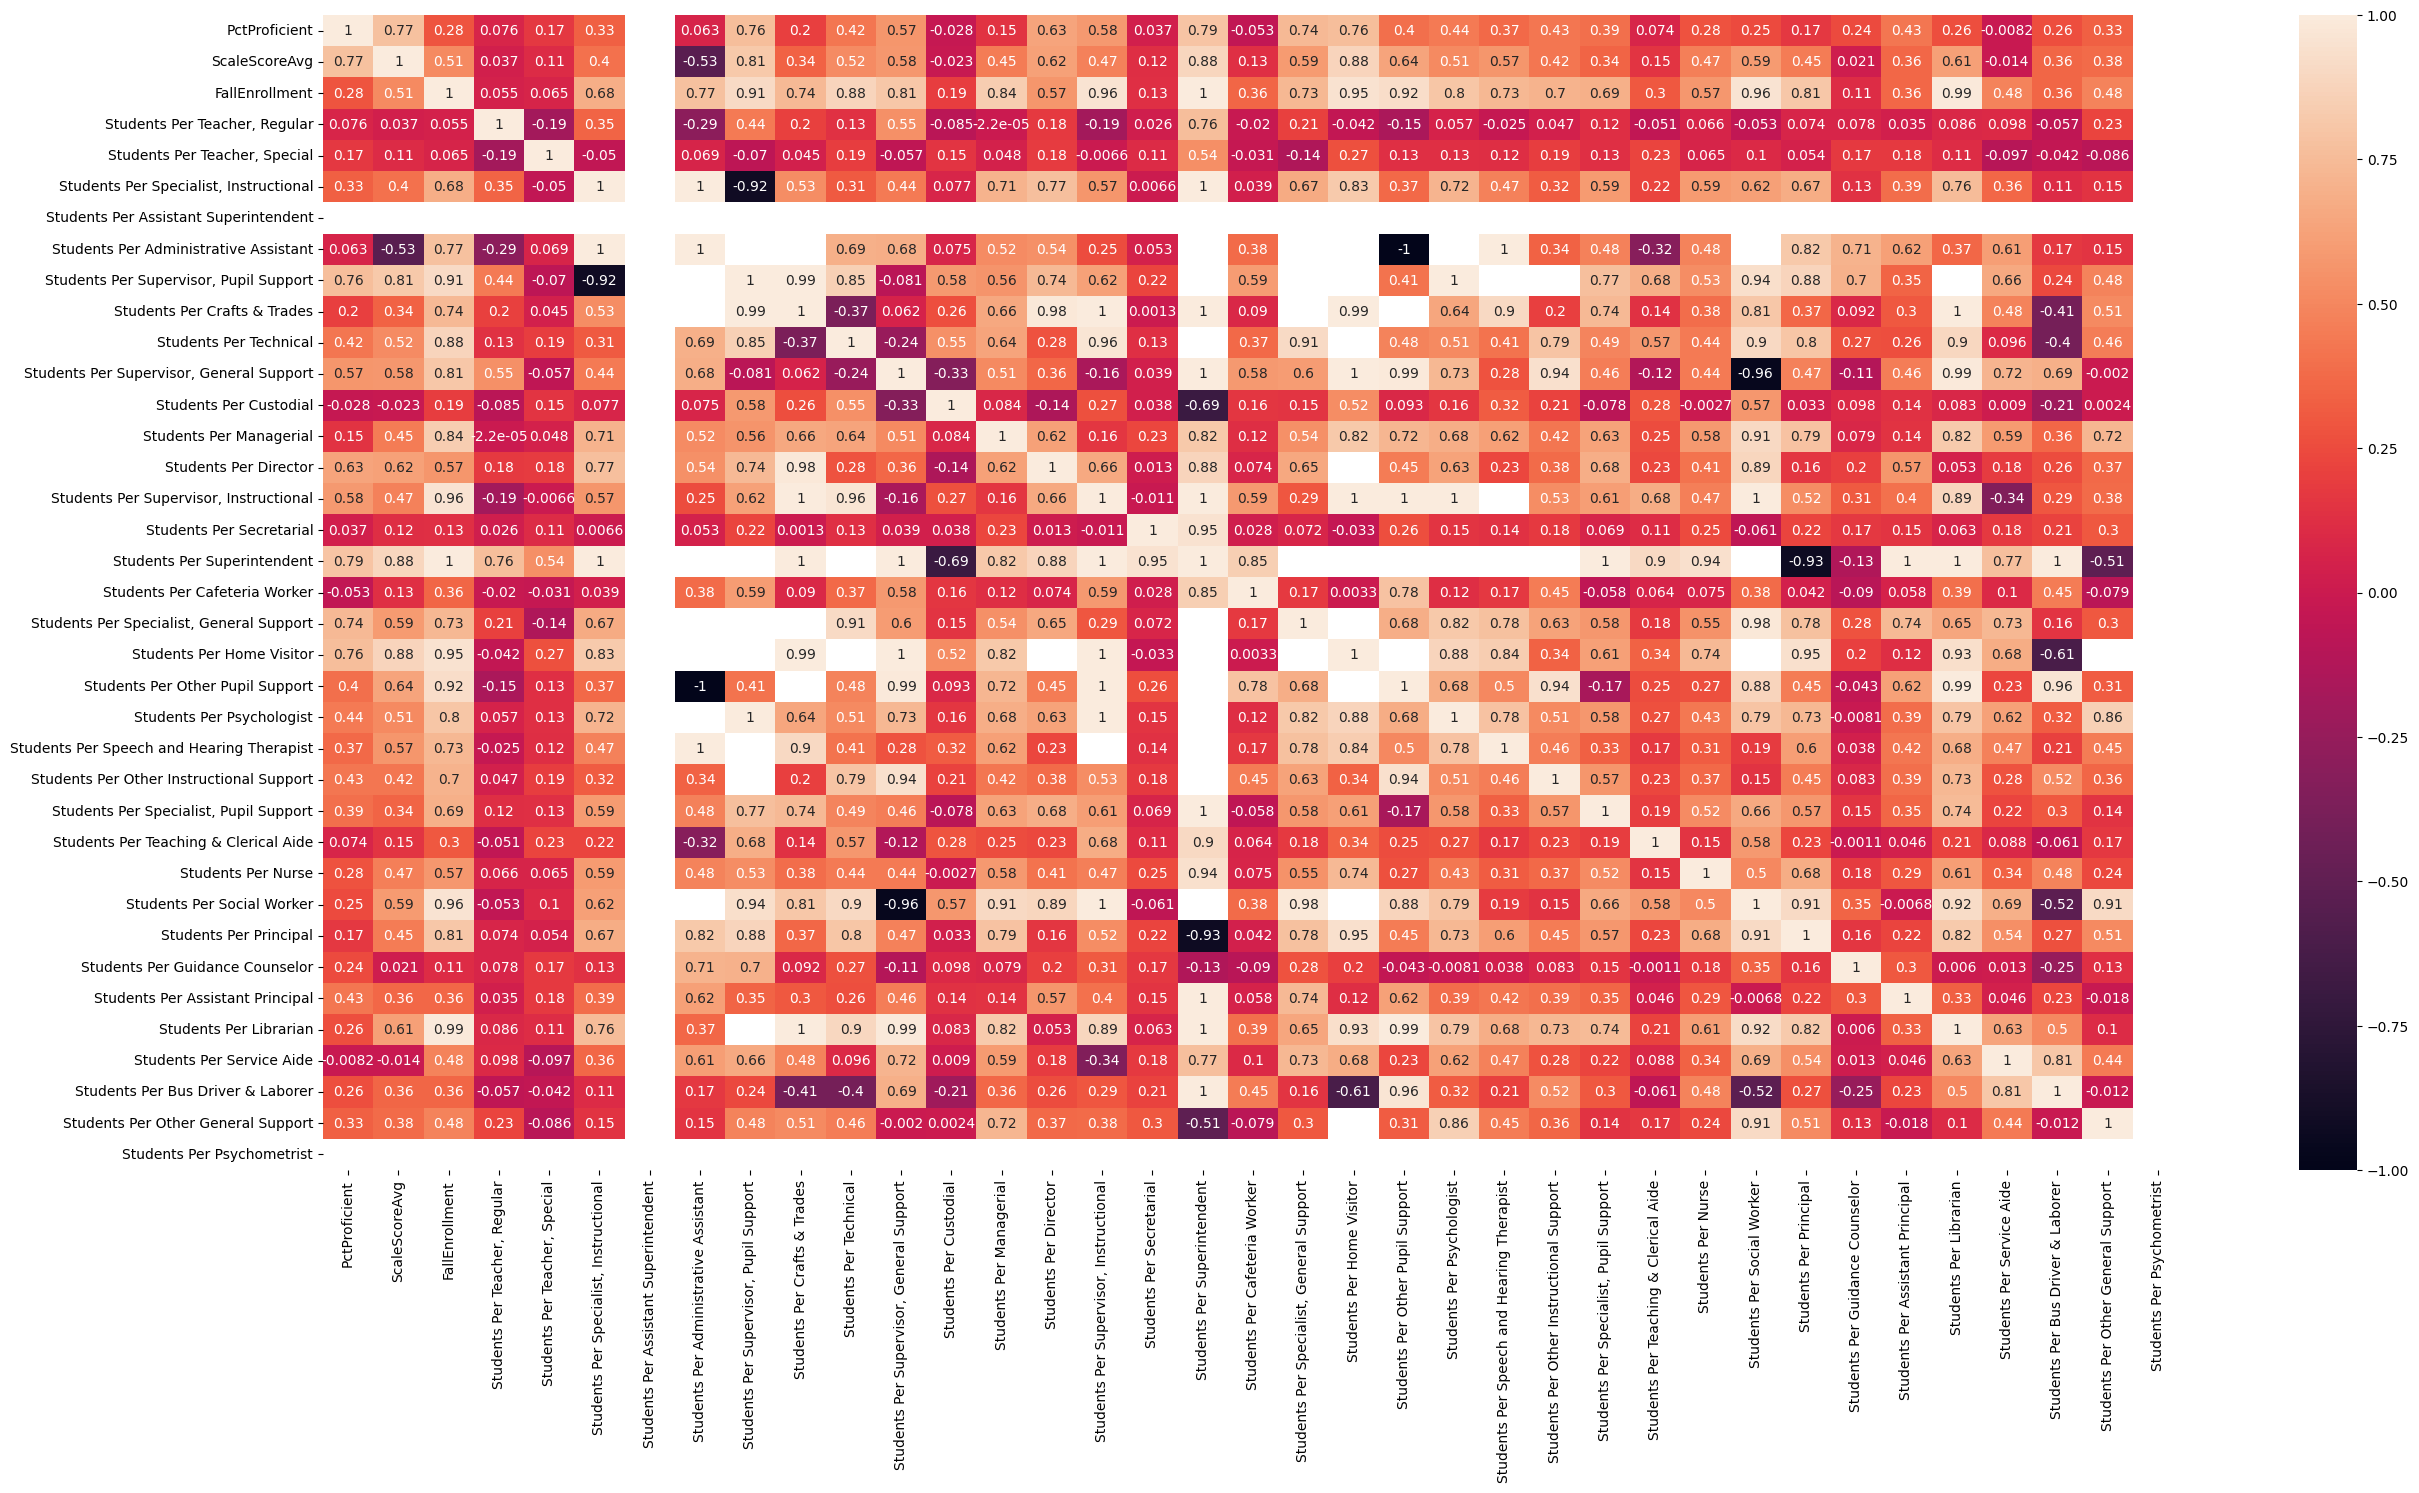

In [68]:
plt.figure(figsize=(30,15))
sns.heatmap(SBSA_ela.corr(), annot=True)

I notice some interesting correlation between PctProficient/ScaleScoreAvg and Supervisor, Pupil Support as well as Specialist, Home Visitors and Librarians for ELA, let's check Math.

<AxesSubplot:>

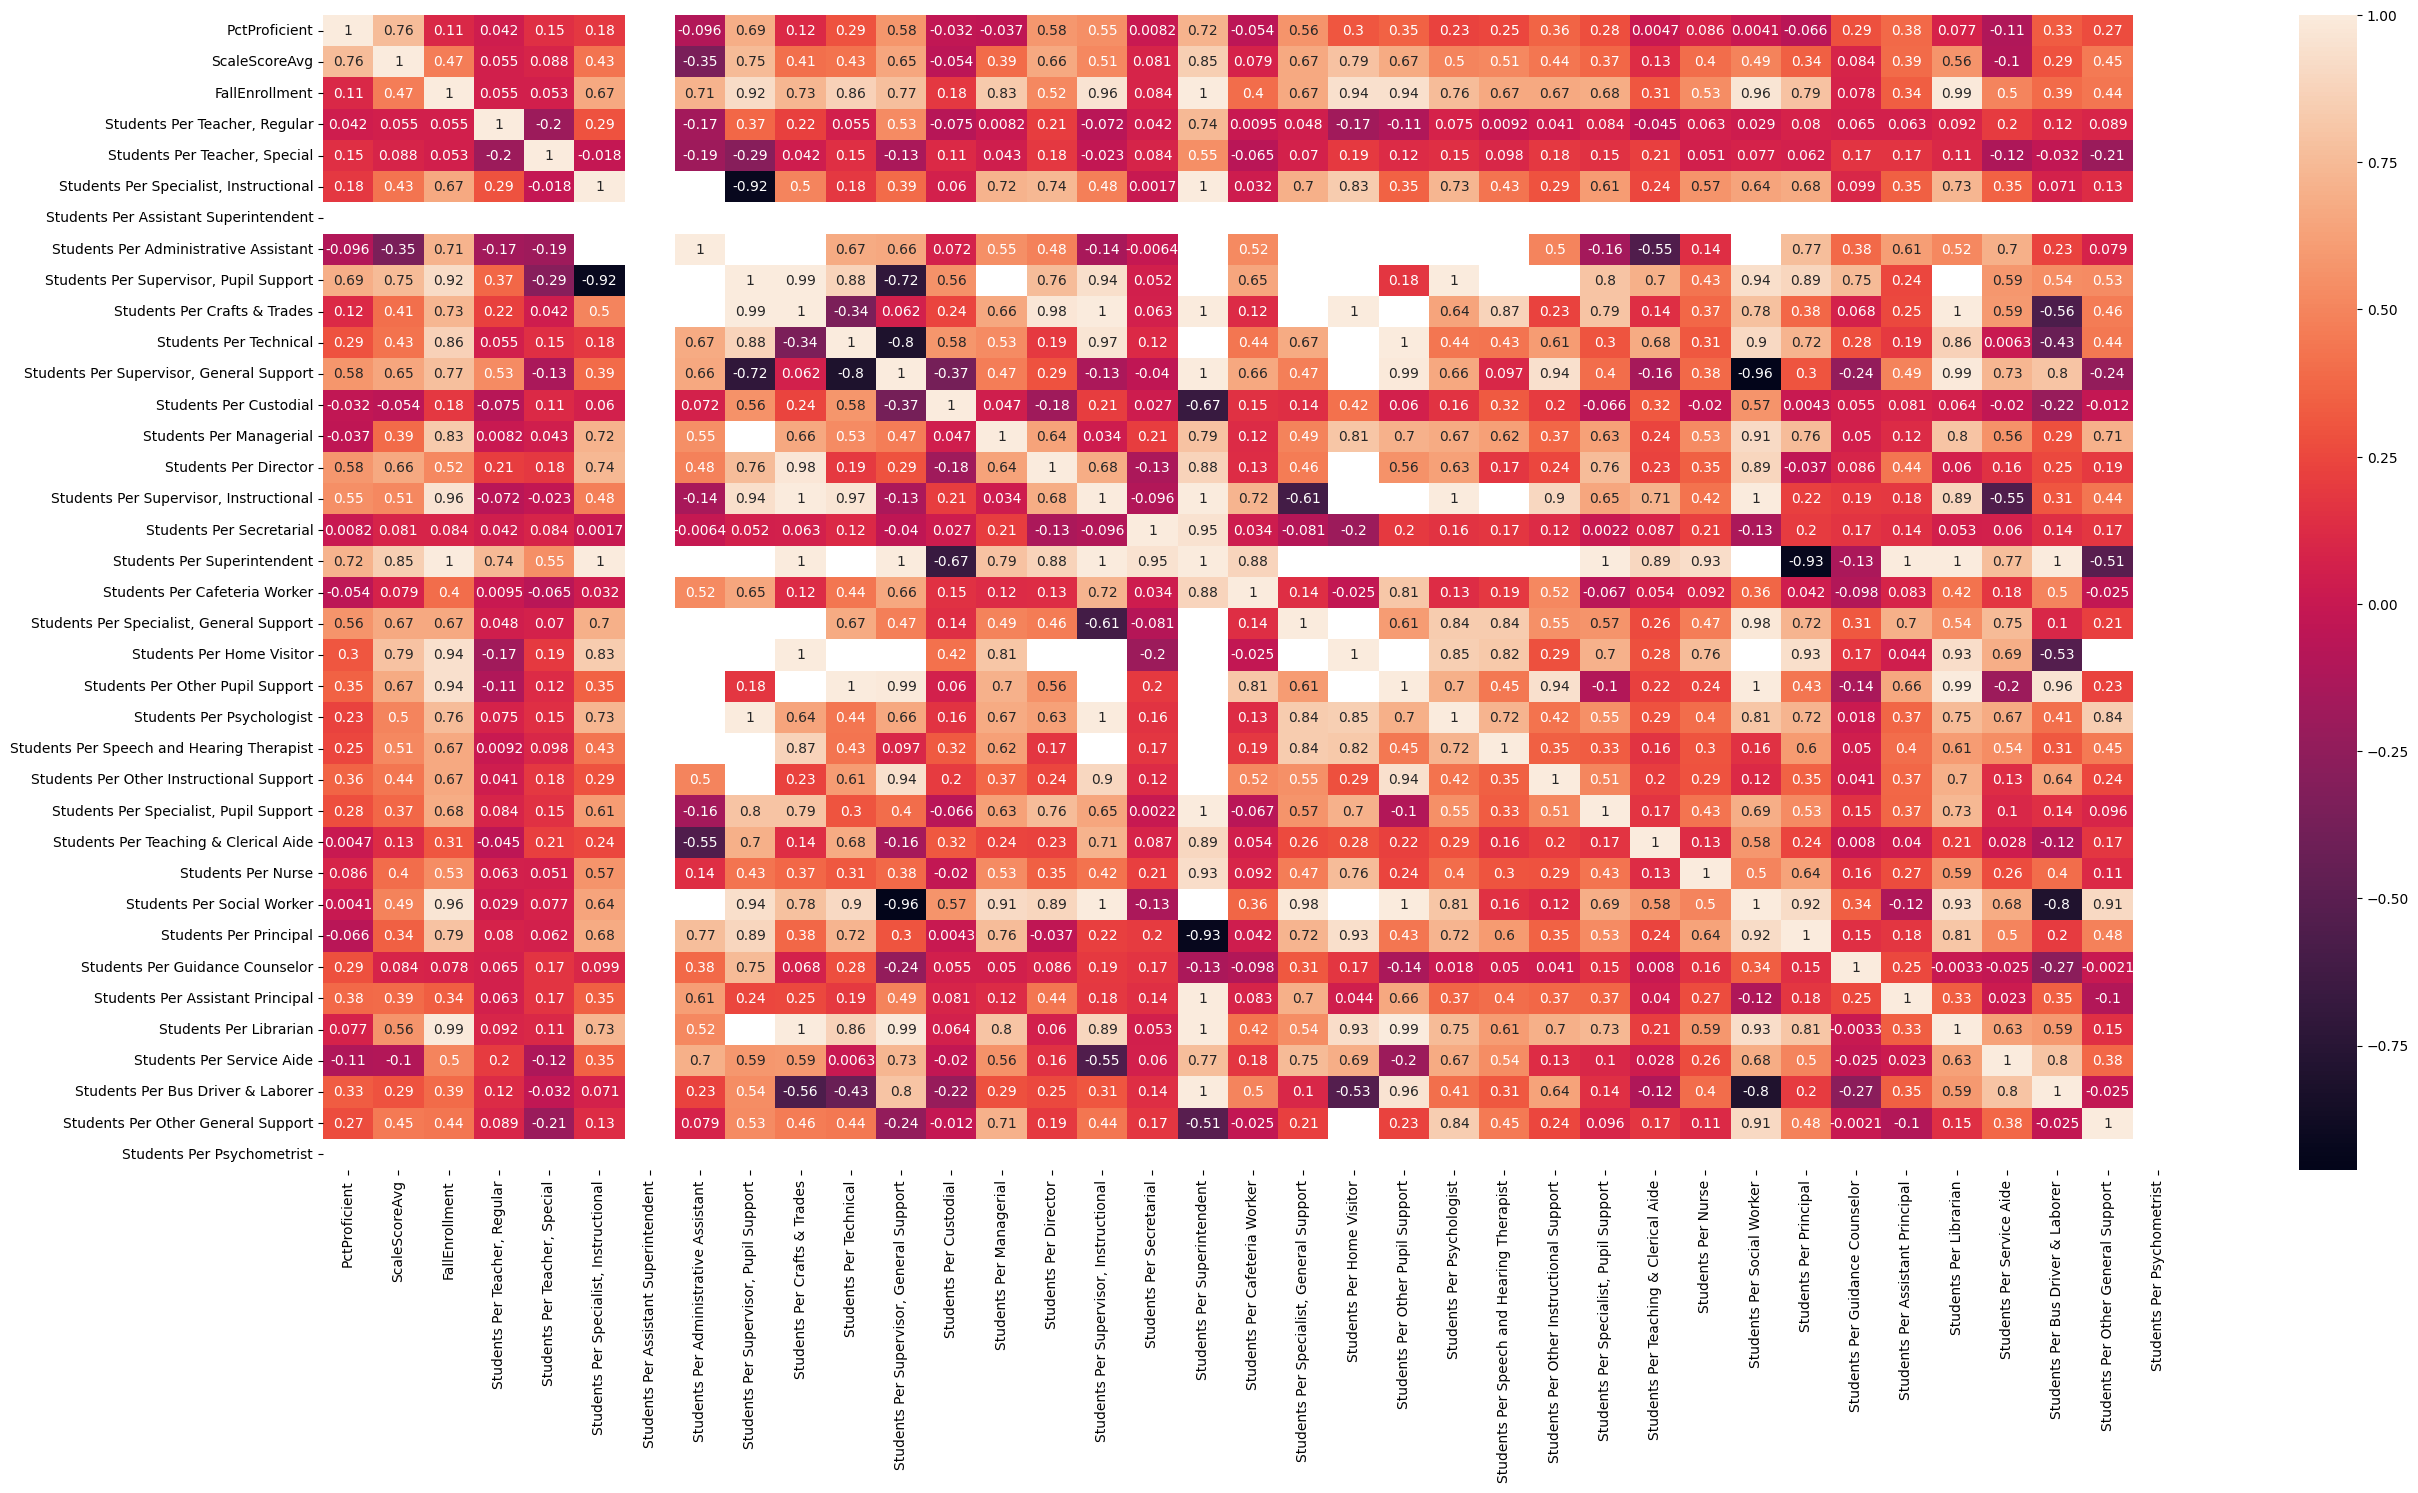

In [69]:
plt.figure(figsize=(30,15))
sns.heatmap(SBSA_math.corr(), annot=True)

That same correlation around Supervisors, Pupil Support exists.

In [70]:
SBSA_ela.to_csv('SBSA_ela.csv', index=False)
SBSA_math.to_csv('SBSA_math.csv', index=False)